In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
import random
import time
import matplotlib.pyplot as plt

from skimage.transform import resize
from tqdm import tqdm # progress which the model
import matplotlib.pyplot as plt
%matplotlib inline

2026-01-14 00:33:05.792840: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/djara/miniconda3/envs/tf216/lib/python3.11/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
df = pd.read_csv('../GalaxyZoo/training_solutions_rev1.csv')
print("El dataset tiene " + str(df.shape[0]) + " filas y " + str(df.shape[1]) + " columnas.")
df.head()

El dataset tiene 61578 filas y 38 columnas.


,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


## Separamos entre training y testing

In [3]:
df_train, df_test = train_test_split(df[:30000], test_size=0.2, random_state=42)
print("El conjunto de entrenamiento tiene forma", df_train.shape)
print("El conjunto de prueba tiene forma", df_test.shape)

El conjunto de entrenamiento tiene forma (24000, 38)
El conjunto de prueba tiene forma (6000, 38)


In [4]:
df_train.describe()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,...,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,320594.056208,0.430368,0.544842,0.024790,0.107513,0.437329,0.102317,0.335012,0.217030,0.220299,...,0.033109,0.092307,0.084450,0.040273,0.015441,0.094735,0.017811,0.007573,0.007093,0.074375
std,126619.098983,0.282792,0.295557,0.037028,0.213953,0.302244,0.177002,0.248387,0.285987,0.179451,...,0.099073,0.145359,0.140342,0.101303,0.052082,0.194877,0.068275,0.038224,0.037687,0.107902
min,100008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,209654.500000,0.176245,0.285108,0.000000,0.000000,0.169317,0.000000,0.123459,0.000000,0.072815,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,323148.500000,0.414047,0.561662,0.014683,0.000000,0.399377,0.000000,0.292182,0.094934,0.184943,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,429132.500000,0.675712,0.811246,0.033935,0.087150,0.696268,0.134753,0.520171,0.336768,0.338788,...,0.000000,0.148840,0.127553,0.030458,0.000000,0.098276,0.000000,0.000000,0.000000,0.129786
max,540177.000000,1.000000,1.000000,0.935147,1.000000,1.000000,1.000000,1.000000,1.000000,0.925311,...,0.901991,0.949733,0.850616,0.991539,0.825312,1.000000,0.975913,0.957000,0.938881,0.664057


## Exploratory Data Analysis para las imagenes

In [5]:
trainPath = '../GalaxyZoo/images_training_rev1/'
testPath = '../GalaxyZoo/images_test_rev1/'

In [6]:
def plot_random_galaxy(path, sample = 5):
    random_image=random.sample(os.listdir(path),sample) #Lista todo los archivos en el directorio y selecciona 'sample' aleatoriamente
 
    plt.figure(figsize=(16,5))
    for i in range(sample):
        
        plt.subplot(1,sample,i+1) #
        img=tf.io.read_file(os.path.join(path,random_image[i])) # construye ruta completa (ej: 'GalaxyZoo/images_training_rev1/123.jpg' 
        img=tf.io.decode_image(img)
        plt.imshow(img)
        plt.title(f'Class: {random_image[i]}\nShape: {img.shape}')
        plt.axis(False) 

2026-01-14 00:33:08.036151: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2026-01-14 00:33:08.041324: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2026-01-14 00:33:08.041385: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2026-01-14 00:33:08.043155: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2026-01-14 00:33:08.043249: I external/local_xla/xla/stream_executor

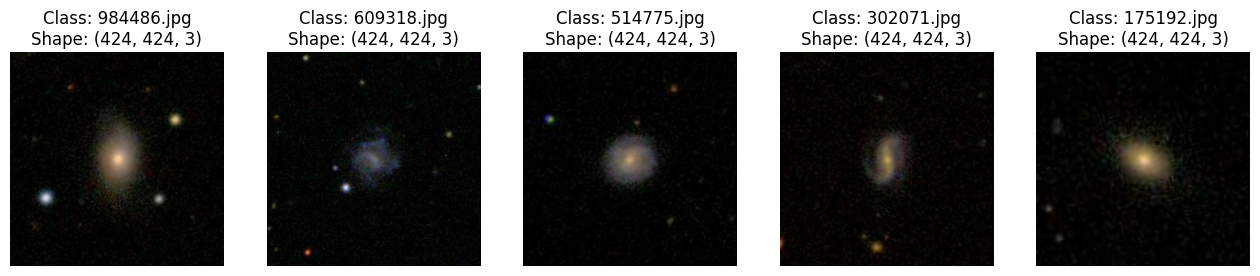

In [7]:
plot_random_galaxy(trainPath)

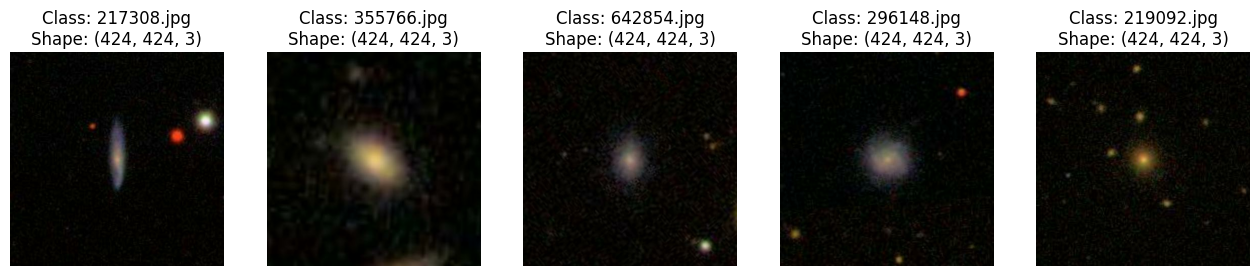

In [8]:
plot_random_galaxy(testPath)

In [9]:
ORIG_SHAPE = (424,424)
CROP_SIZE = (256,256)
IMG_SHAPE = (64,64)

tt = time.time()
def get_image(path, x1, y1, shape, crop_size): #Lee la imagen desde el path, la recorta y la redimensiona
    # Usar TensorFlow para leer la imagen (igual que en plot_random_galaxy que funciona)
    img = tf.io.read_file(path)
    img = tf.io.decode_image(img, channels=3)
    img = tf.cast(img, tf.float32)  # Convertir a float32
    
    # Recortar
    img = img[x1:x1+crop_size[0], y1:y1+crop_size[1]]
    
    # Redimensionar
    img = tf.image.resize(img, shape)
    
    # Normalizar (tf.io.decode_image devuelve 0-255 para JPG)
    img = img / 255.0
    
    return img.numpy()
    
def get_all_images(dataframe, shape=IMG_SHAPE, crop_size=CROP_SIZE): #Obtiene todas las imágenes del dataframe, las recorta y redimensiona
    x1 = (ORIG_SHAPE[0]-CROP_SIZE[0])//2
    y1 = (ORIG_SHAPE[1]-CROP_SIZE[1])//2
   
    sel = dataframe.values
    ids = sel[:,0].astype(int).astype(str)
    y_batch = sel[:,1:]
    x_batch = []
    for i in tqdm(ids):
        x = get_image('../GalaxyZoo/images_training_rev1/'+i+'.jpg', x1, y1, shape=shape, crop_size=crop_size)
        x_batch.append(x)
    x_batch = np.array(x_batch)
    return x_batch, y_batch
        
X_train, y_train = get_all_images(df_train)
X_test, y_test = get_all_images(df_test)
print('Procesado en: ', (time.time()-tt)/60, " minutos")


100%|██████████| 6000/6000 [00:15<00:00, 378.72it/s]


Procesado en:  1.4094059069951375  minutos


In [10]:
print("Forma del train: ",X_train.shape)
print("Forma del train: ",X_test.shape)

Forma del train:  (24000, 64, 64, 3)
Forma del train:  (6000, 64, 64, 3)


## Creamos la red neuronal

In [11]:
# Verificar disponibilidad de GPU
print("=" * 60)
print("VERIFICACIÓN DE GPU")
print("=" * 60)

# Listar dispositivos
gpus = tf.config.list_physical_devices('GPU')
cpus = tf.config.list_physical_devices('CPU')

print(f"\n✓ GPUs disponibles: {len(gpus)}")
for gpu in gpus:
    print(f"  - {gpu}")
    
print(f"\n✓ CPUs disponibles: {len(cpus)}")
for cpu in cpus:
    print(f"  - {cpu}")

# Verificar si CUDA está disponible
print(f"\n✓ TensorFlow versión: {tf.__version__}")
print(f"✓ Built with CUDA: {tf.test.is_built_with_cuda()}")

# Habilitar crecimiento de memoria GPU (evita OOM)
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("\n✓ Crecimiento de memoria GPU habilitado")
    except RuntimeError as e:
        print(f"\n✗ Error configurando memoria: {e}")
else:
    print("\n⚠ ADVERTENCIA: No se detectaron GPUs. El entrenamiento será MÁS LENTO.")

print("=" * 60 + "\n")

VERIFICACIÓN DE GPU

✓ GPUs disponibles: 1
  - PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')

✓ CPUs disponibles: 1
  - PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')

✓ TensorFlow versión: 2.16.1
✓ Built with CUDA: True

✗ Error configurando memoria: Physical devices cannot be modified after being initialized



In [12]:
# Estrategia de distribución para GPU
# Usar la estrategia por defecto de TensorFlow para evitar mezclar objetos de estrategia
strategy = tf.distribute.get_strategy()
if gpus:
    print(f"Usando {len(gpus)} GPU(s) para entrenamiento")
else:
    print("Usando CPU para entrenamiento")

print(f"Número de réplicas: {strategy.num_replicas_in_sync}\n")


Usando 1 GPU(s) para entrenamiento
Número de réplicas: 1



In [13]:
import tensorflow as tf
import numpy as np
import time
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
from tensorflow.keras import Input  # <--- ESTA ES LA IMPORTACIÓN QUE FALTABA
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.svm import LinearSVR
from sklearn.multioutput import MultiOutputRegressor

def root_mean_squared_error(y_true, y_pred):
    # Usar operaciones de TensorFlow para mayor compatibilidad (evita mezclar keras y tf.keras)
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

data_augmentation = models.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),  # Rotación aleatoria del 20%
    layers.RandomZoom(0.1),
])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# Crear el modelo dentro de la estrategia de distribución
with strategy.scope():
    # A. Definimos la entrada explícitamente (Esto elimina el error de "input not defined")
    inputs = Input(shape=(IMG_SHAPE[0], IMG_SHAPE[1], 3), name='input_image')
    
    # B. Data Augmentation
    x = data_augmentation(inputs)
    
    # C. Bloques Convolucionales (Conectamos x con la capa anterior)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # D. Capa de Características (LE PONEMOS NOMBRE PARA ENCONTRARLA FÁCIL)
    # Esta variable 'features' guarda el tensor de 256 valores
    features = layers.GlobalAveragePooling2D(name='feature_layer')(x)
    
    # E. Capa de Salida (Solo para entrenar la CNN primero)
    outputs = layers.Dense(37, activation='sigmoid', name='output_layer')(features)

    # F. Crear el Modelo
    model = Model(inputs=inputs, outputs=outputs, name="Galaxy_CNN_Functional")

    # Compilación
    model.compile(optimizer=opt,
                  loss=root_mean_squared_error,
                  metrics=['mse'])
                  
model.summary()

reduce_lr = ReduceLROnPlateau(monitor='val_mse', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
# Detiene el entrenamiento si no mejora para evitar overfitting
early_stop = EarlyStopping(monitor='val_mse', mode='min', patience=10, restore_best_weights=True, verbose=1)


Model: "Galaxy_CNN_Functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ feature_layer                   │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 37)             │         9,509 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 382,117 (1.46 MB)

 Trainable params: 381,221 (1.45 MB)

 Non-trainable params: 896 (3.50 KB)

In [14]:
print("\n" + "="*60)
print("INICIANDO ENTRENAMIENTO")
print("="*60)

t = time.time()
ep = 30

# Entrenar con callbacks y monitoreo
history = model.fit(
    X_train, y_train, 
    epochs=ep, 
    batch_size=256,  # Aumentar batch_size también ayuda a GPU
    validation_data=(X_test, y_test),
    callbacks=[reduce_lr, early_stop],
    verbose=1  # Mostrar progreso detallado
)

tiempo_entrenamiento = time.time() - t
print(f"\n✓ Tiempo de entrenamiento: {tiempo_entrenamiento:.2f} segundos")
print(f"✓ Tiempo promedio por epoch: {tiempo_entrenamiento/ep:.2f} segundos")
print(f"\n✓ Tiempo de entrenamiento: {tiempo_entrenamiento/60:.2f} minutos")
print(f"✓ Tiempo promedio por epoch: {tiempo_entrenamiento/(ep*60):.2f} minutos")
print("="*60)


INICIANDO ENTRENAMIENTO


2026-01-14 00:34:34.856045: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1179648000 exceeds 10% of free system memory.
2026-01-14 00:34:35.991434: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1179648000 exceeds 10% of free system memory.


Epoch 1/30


2026-01-14 00:34:39.805928: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 123ms/step - loss: 0.1547 - mse: 0.0257 - val_loss: 0.3704 - val_mse: 0.1372 - learning_rate: 0.0010
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - loss: 0.1255 - mse: 0.0158 - val_loss: 0.2597 - val_mse: 0.0674 - learning_rate: 0.0010
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - loss: 0.1175 - mse: 0.0138 - val_loss: 0.2134 - val_mse: 0.0455 - learning_rate: 0.0010
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - loss: 0.1127 - mse: 0.0127 - val_loss: 0.2200 - val_mse: 0.0484 - learning_rate: 0.0010
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - loss: 0.1097 - mse: 0.0120 - val_loss: 0.2316 - val_mse: 0.0537 - learning_rate: 0.0010
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - loss: 0.1074 - mse: 0.0115 - val_loss: 0.1881 - val_mse: 0.0354 - learning_rate: 0.0010
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step - loss: 0.1056 - mse: 0.0112 - val_loss: 0.1458 - val_mse: 0.0213 - learning_rate: 0.0010
Epoch 8/30

In [15]:
import numpy as np

# Pasa un array de ceros con la forma de una sola imagen
# Esto no entrena nada, solo "despierta" al modelo
model.predict(np.zeros((1, 64, 64, 3)), verbose=0)

# Ahora ya puedes usar model.input sin errores

array([[0.3473109 , 0.6289421 , 0.0718526 , 0.3461475 , 0.5630906 ,
        0.37426126, 0.41874692, 0.33654284, 0.35878262, 0.240665  ,
        0.35497478, 0.26495388, 0.09034452, 0.236479  , 0.7679433 ,
        0.3593485 , 0.22584705, 0.15296234, 0.1264335 , 0.02889734,
        0.12786156, 0.26759976, 0.12350971, 0.03085415, 0.02659634,
        0.23121822, 0.05339089, 0.2544546 , 0.132543  , 0.28547394,
        0.13254751, 0.05673563, 0.23809324, 0.077351  , 0.02703522,
        0.0214565 , 0.16165921]], dtype=float32)

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR
from sklearn.multioutput import MultiOutputRegressor

print("\nIniciando extracción de características para SVR...")

# Crear extractor
extractor = Model(inputs=model.input, outputs=model.get_layer('feature_layer').output)

# Extraer vectores
X_train_features = extractor.predict(X_train, verbose=1)
X_test_features = extractor.predict(X_test, verbose=1)

print("Entrenando SVR...")
svm_regressor = MultiOutputRegressor(
    LinearSVR(
        random_state=42, 
        max_iter=10000,   # Aumentado para evitar el warning
        dual=False,       # Crucial: ponlo en False para tu dataset
        C=1.0,            # Puedes probar bajando a 0.5 si sigue sin converger
        loss='squared_epsilon_insensitive'
    )
)
svm_regressor.fit(X_train_features, y_train)

# Evaluar
print("Evaluando SVR...")
y_pred_svm = svm_regressor.predict(X_test_features)
y_pred_svm = np.clip(y_pred_svm, 0.0, 1.0)
mse_final = np.mean(np.square(y_test - y_pred_svm))

print(f"\n{'='*40}")
print(f"MSE Final del modelo Híbrido CNN-SVR: {mse_final:.5f}")
print(f"{'='*40}")


Iniciando extracción de características para SVR...


2026-01-14 00:42:33.140680: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1179648000 exceeds 10% of free system memory.


750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Entrenando SVR...
Evaluando SVR...

MSE Final del modelo Híbrido CNN-SVR: 0.00920


PREDICCIONES EN CONJUNTO DE TRAINING

DEBUG Muestra 1:
  Min valor imagen: 0.0000
  Max valor imagen: 0.8098
  Shape imagen: (64, 64, 3)

Muestra 1 - Índice: 5307
Clases con probabilidad real > 0.5:
  Clase 0: 0.6080
  Clase 14: 0.7830

Clases con probabilidad predicha > 0.5:
  Clase 0: 0.7394
  Clase 14: 0.9806

Accuracy en esta muestra: 100.00%

DEBUG Muestra 2:
  Min valor imagen: 0.0000
  Max valor imagen: 0.6461
  Shape imagen: (64, 64, 3)

Muestra 2 - Índice: 2696
Clases con probabilidad real > 0.5:
  Clase 1: 0.6512
  Clase 4: 0.6512
  Clase 14: 0.5879

Clases con probabilidad predicha > 0.5:
  Clase 0: 0.7325
  Clase 14: 0.9798

Accuracy en esta muestra: 91.89%

DEBUG Muestra 3:
  Min valor imagen: 0.0000
  Max valor imagen: 0.9569
  Shape imagen: (64, 64, 3)

Muestra 3 - Índice: 7624
Clases con probabilidad real > 0.5:
  Clase 0: 0.5751
  Clase 14: 0.9181

Clases con probabilidad predicha > 0.5:
  Clase 0: 0.7510
  Clase 14: 0.9819

Accuracy en esta muestra: 100.00%


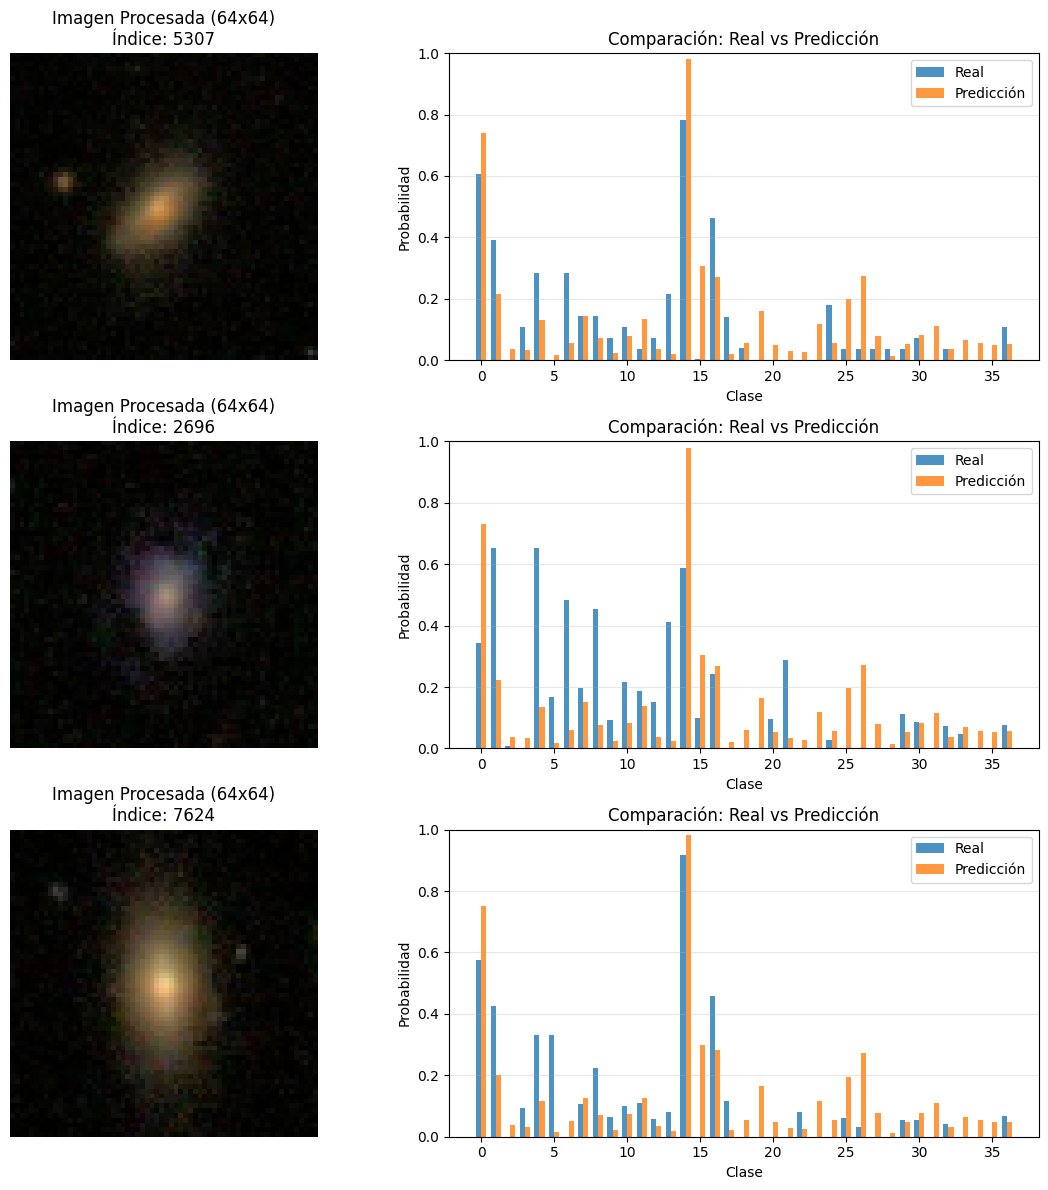



PREDICCIONES EN CONJUNTO DE TEST

DEBUG Muestra 1:
  Min valor imagen: 0.0000
  Max valor imagen: 0.9500
  Shape imagen: (64, 64, 3)

Muestra 1 - Índice: 1780
Clases con probabilidad real > 0.5:
  Clase 0: 0.7689
  Clase 14: 0.9660
  Clase 15: 0.5834

Clases con probabilidad predicha > 0.5:
  Clase 0: 0.7277
  Clase 14: 0.9773

Accuracy en esta muestra: 97.30%

DEBUG Muestra 2:
  Min valor imagen: 0.0000
  Max valor imagen: 0.9284
  Shape imagen: (64, 64, 3)

Muestra 2 - Índice: 1567
Clases con probabilidad real > 0.5:
  Clase 1: 0.9780
  Clase 4: 0.9555
  Clase 6: 0.6220
  Clase 7: 0.9555
  Clase 10: 0.5551
  Clase 14: 0.8000
  Clase 28: 0.5551

Clases con probabilidad predicha > 0.5:
  Clase 0: 0.7263
  Clase 14: 0.9770

Accuracy en esta muestra: 81.08%

DEBUG Muestra 3:
  Min valor imagen: 0.0000
  Max valor imagen: 0.9010
  Shape imagen: (64, 64, 3)

Muestra 3 - Índice: 797
Clases con probabilidad real > 0.5:
  Clase 1: 0.8180
  Clase 4: 0.7951
  Clase 7: 0.5908
  Clase 13: 0.625

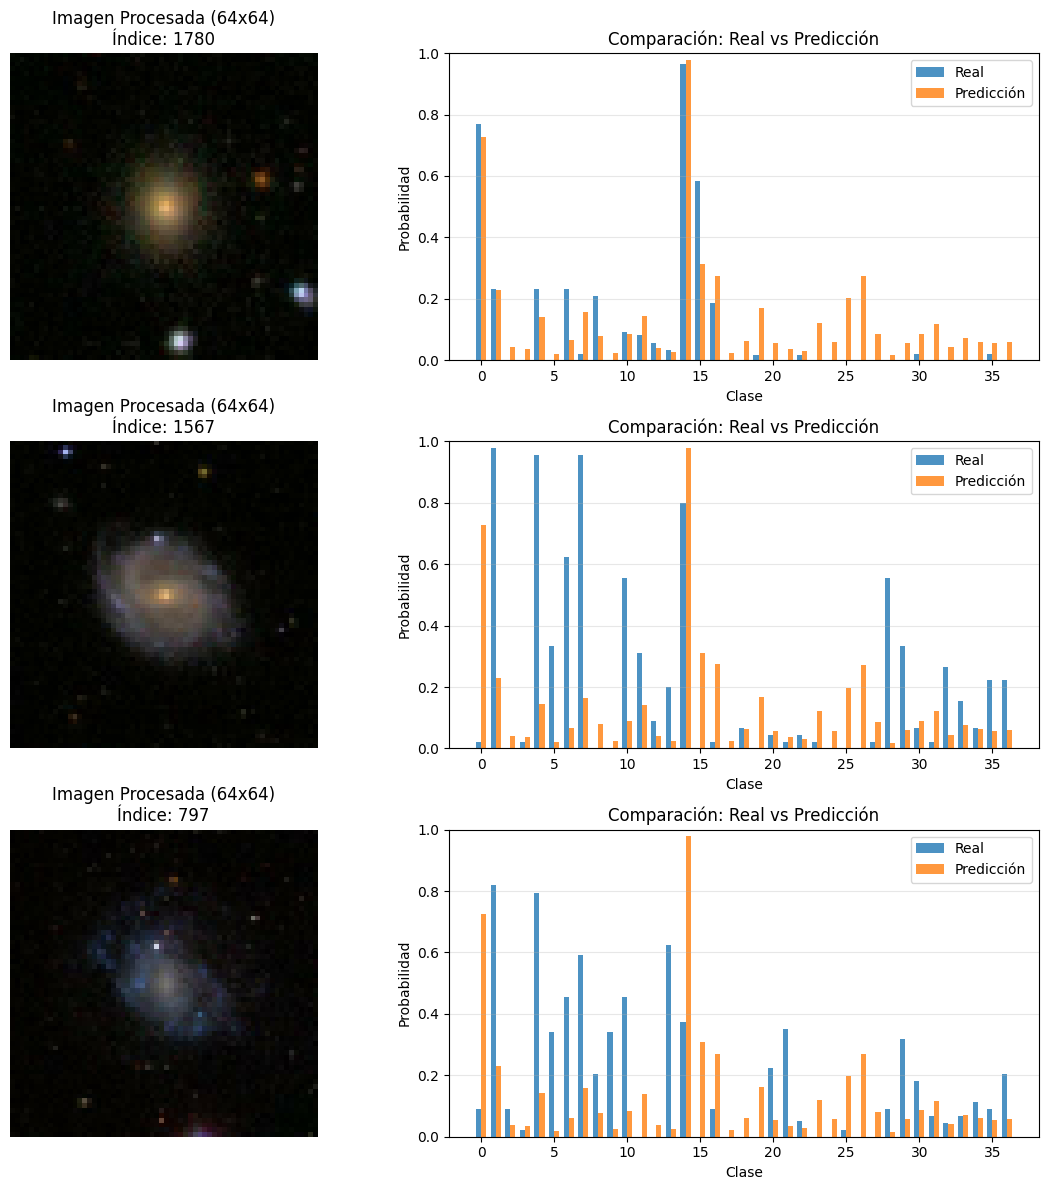



UNA SOLA MUESTRA

DEBUG Muestra 1:
  Min valor imagen: 0.0000
  Max valor imagen: 0.9529
  Shape imagen: (64, 64, 3)

Muestra 1 - Índice: 1542
Clases con probabilidad real > 0.5:
  Clase 0: 0.8324
  Clase 14: 0.8731
  Clase 16: 0.7152

Clases con probabilidad predicha > 0.5:
  Clase 0: 0.7793
  Clase 14: 0.9853

Accuracy en esta muestra: 97.30%


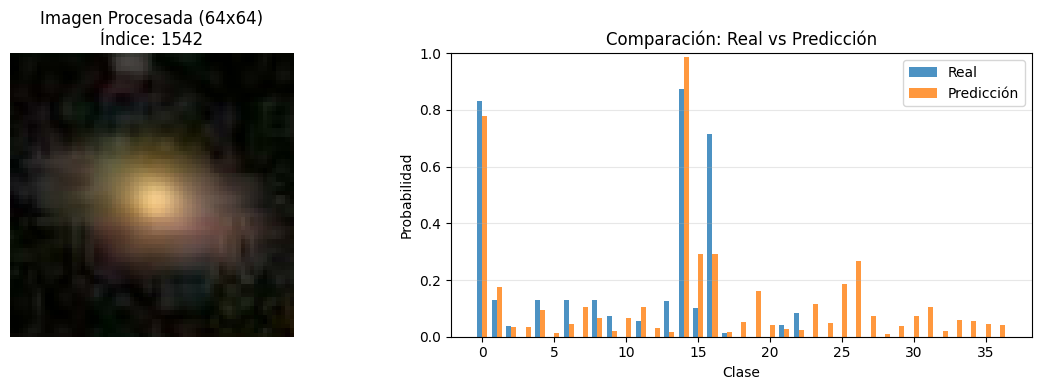

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from skimage.transform import resize

def predict_random_galaxy(model, X_data, y_data, data_path, num_samples=3):
    """
    Visualiza predicciones del modelo en imágenes random
    
    Args:
        model: Modelo entrenado
        X_data: Datos de imágenes procesadas (train o test)
        y_data: Etiquetas reales (train o test)
        data_path: Ruta de las imágenes originales
        num_samples: Número de muestras a visualizar
    """
    
    # Seleccionar índices random
    random_indices = random.sample(range(len(X_data)), num_samples)
    
    fig, axes = plt.subplots(num_samples, 2, figsize=(12, 4*num_samples))
    
    if num_samples == 1:
        axes = [axes]
    
    for idx, random_idx in enumerate(random_indices):
        # Obtener imagen procesada y etiqueta real
        img_processed = X_data[random_idx]
        y_real = y_data[random_idx]
        
        # Hacer predicción
        y_pred = model.predict(np.expand_dims(img_processed, axis=0), verbose=0)[0]
        
        # DEBUG: Verificar valores de la imagen
        print(f"\nDEBUG Muestra {idx+1}:")
        print(f"  Min valor imagen: {img_processed.min():.4f}")
        print(f"  Max valor imagen: {img_processed.max():.4f}")
        print(f"  Shape imagen: {img_processed.shape}")
        
        # Mostrar imagen procesada (izquierda) - Asegurar que se muestre correctamente
        # vmin y vmax garantizan que matplotlib interprete bien los valores normalizados
        axes[idx][0].imshow(img_processed, vmin=0, vmax=1, cmap='viridis')
        axes[idx][0].set_title(f'Imagen Procesada (64x64)\nÍndice: {random_idx}')
        axes[idx][0].axis('off')
        
        # Mostrar gráfico de predicciones vs reales (derecha)
        x_pos = np.arange(len(y_real))
        width = 0.35
        
        axes[idx][1].bar(x_pos - width/2, y_real, width, label='Real', alpha=0.8)
        axes[idx][1].bar(x_pos + width/2, y_pred, width, label='Predicción', alpha=0.8)
        axes[idx][1].set_xlabel('Clase')
        axes[idx][1].set_ylabel('Probabilidad')
        axes[idx][1].set_title(f'Comparación: Real vs Predicción')
        axes[idx][1].legend()
        axes[idx][1].set_ylim([0, 1])
        axes[idx][1].grid(axis='y', alpha=0.3)
        
        # Imprimir información detallada
        print(f"\n{'='*60}")
        print(f"Muestra {idx+1} - Índice: {random_idx}")
        print(f"{'='*60}")
        print(f"Clases con probabilidad real > 0.5:")
        for i, prob in enumerate(y_real):
            if prob > 0.5:
                print(f"  Clase {i}: {prob:.4f}")
        
        print(f"\nClases con probabilidad predicha > 0.5:")
        for i, prob in enumerate(y_pred):
            if prob > 0.5:
                print(f"  Clase {i}: {prob:.4f}")
        
        # Calcular accuracy por muestra
        accuracy = np.mean((y_pred > 0.5) == (y_real > 0.5))
        print(f"\nAccuracy en esta muestra: {accuracy*100:.2f}%")
    
    plt.tight_layout()
    plt.show()

# ============================================
# USAR LA FUNCIÓN
# ============================================

# Opción 1: Predecir en imágenes de TRAINING
print("PREDICCIONES EN CONJUNTO DE TRAINING")
predict_random_galaxy(model, X_train, y_train, trainPath, num_samples=3)

# Opción 2: Predecir en imágenes de TEST
print("\n\nPREDICCIONES EN CONJUNTO DE TEST")
predict_random_galaxy(model, X_test, y_test, testPath, num_samples=3)

# Opción 3: Una sola muestra específica
print("\n\nUNA SOLA MUESTRA")
predict_random_galaxy(model, X_test, y_test, testPath, num_samples=1)
